## Data Loading

In [1]:
import pandas as pd
# 깃허브에 준비된 데이터를 가져옵니다.
#아이리스 데이터를 불러옵니다.
df = pd.read_csv('c:/data/data/iris3.csv')

## Confirm Y value
 - y값에 따라서 회귀, 이항분류 시그모이드, 이항분류이상의 소프트맥스
 - y값이 3개의 카테고리 중 한개를 선택하는 다항분류임으로
 - Dense 층의 가장 하단(최우측)의 output은 Dense(3, activation='softmax')
 - model.compile(loss='categorical_crossentropy')
 - ================================================> y값이 원핫인코딩 되어 있어야함
 - ================================================> y값이 숫자이지만 원핫인코딩이 안되어 있다면

In [3]:
# 아래의 결과를 확인하염 3개의 카테고리로 되어 있음을 알수 있음
df.iloc[:,4].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
# 카테고리 갯수를 알고자 한다면
len(df.iloc[:,4].value_counts())

3

<BarContainer object of 3 artists>

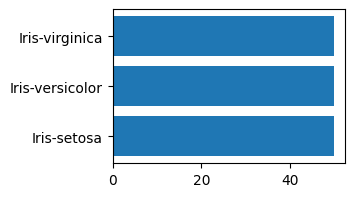

In [5]:
# 데이터의 편향없이 3개의 카테고리에 갯수가 잘 분포되어 있는지를 확인하려면
import matplotlib.pyplot as plt

tmp=df.iloc[:,4].value_counts()

plt.figure(figsize=(3,2))
plt.barh(tmp.index, tmp)   #barh는 x값라벨의 글자가 길어서 잘 안보일때 유용함

## Separate X and Y
 - 머신러닝, 딥러닝의 데이터셋은 모두 숫자여야함.
 - Null값 있으면 안됨

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
X=df.iloc[:, :4] 
y=df.iloc[:,4]

print(X.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [9]:
# y값은 문자이면 안됨.

# 텐서플로우에서는 
# 레벨인코딩까지만 하고  model.compile(loss='sparse_categorical_crossentropy'     로 작업하면 되고(이 명령이 원핫인코딩을 수행해줌)
# 원핫인코딩 또는 더미변수화를 시키면  model.compile(loss='categorical_crossentropy'  로 작업함

# 데이터프레임이어서 더미변수명령이 가능함.. 만약 데이터프레임이 아니라면 , 레벨인코딩하고->원핫인코딩하는 작업을 진행해야함.
# 제공한 자료의 06.활성화함수_소프트맥스.pptx에서의  1-2번 슬라이드 참조
#  하단의 이미지 참조
y=pd.get_dummies(y)  
y[:3]

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False


## Split train and test
 - 트레이닝 테스트 데이터를 분리하여서 훈련데이터로 w,b를 갱신하고, 테스트데이터에 w,b를 적용하여 모델의 적합성을 검증함.
 - 비정형 데이터 분석에서는 트레이닝 테스트를 분리하는 사이킷런 모듈이 필요하지 않을수도 있음.
  - 비정형데이터 분석에서는 자신의 PC에 폴더별로 자료를 넣어놓으면 (예: 강아지폴더에 강아지사진... , 고양이폴더에 고양이 사진....)
  - 텐서플로우나, 파이토치등의 딥러닝 프레임워크에서 폴더에 있는 자료에서 트레이닝과 테스트를 나누어서 불러오는 'load_directory' 기능을 제공함.
  - 이 기능을 사용하면 자동으로 폴더 이름을 이용하여서 자동으로 y값을 레벨 인코딩 까지 하면서 자료를 만듦.
  - 배치사이즈도 지정하면 그 숫자만큼 데이터를 읽어오는 기능도 제공함

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test 의 순서에 유의해주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777)  # 150 개중 *75%는  train.

np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((112, 4), (112, 3), (38, 4), (38, 3))

## Modeling

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu')) # x값이4개 w(4)+b(1)=5개파람 *  12개=>60개
model.add(Dense(8,  activation='relu'))  # x값이 12개  w(12)+b(1)=13개파람 * 8개=104개
model.add(Dense(3, activation='softmax')) # x값이 8개 w(8)+b(1)=9개파람 * 3개=27개
#model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 에포크당 w,b를 레이어층에 맞추어서 저장
# modelpath는 폴더없으면 생성됨
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/iris/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose기본값이 0임, 1을 지정하지 않으면 결과가 화면에 출력되지 않음


# 모델 실행
# 전체112개(150개중75%의)의 데이터셋, 배치5 총 (112/5)=> 23회의 배치작업이 이루어짐. 배치23회*에포크80회=총 1840회의 optimizer='adam'작업이 이루어짐
# 배치에서는 w,b갱신만하고 총배치가 다끝나는 1에포크에서 생성된 w,b값을  validation_data에 넣어서 확인함
history=model.fit(X_train, y_train, 
                  epochs=80, 
                  batch_size=5, 
                  validation_data=(X_test, y_test),
                  callbacks=[checkpointer],
                  verbose=0)   #verbose는 기본값이 1임,  옵션값을 넣지 않으면 출력물이 화면에 보이고, verbose를 0으로 하면 출력물이 보이지 않음


Epoch 1: saving model to c:/data/model/iris\01-0.3421.hdf5

Epoch 2: saving model to c:/data/model/iris\02-0.4737.hdf5

Epoch 3: saving model to c:/data/model/iris\03-0.6842.hdf5

Epoch 4: saving model to c:/data/model/iris\04-0.6842.hdf5

Epoch 5: saving model to c:/data/model/iris\05-0.6842.hdf5

Epoch 6: saving model to c:/data/model/iris\06-0.7105.hdf5

Epoch 7: saving model to c:/data/model/iris\07-0.7632.hdf5

Epoch 8: saving model to c:/data/model/iris\08-0.8158.hdf5

Epoch 9: saving model to c:/data/model/iris\09-0.7632.hdf5

Epoch 10: saving model to c:/data/model/iris\10-0.8158.hdf5

Epoch 11: saving model to c:/data/model/iris\11-0.8158.hdf5

Epoch 12: saving model to c:/data/model/iris\12-0.7895.hdf5

Epoch 13: saving model to c:/data/model/iris\13-0.8158.hdf5

Epoch 14: saving model to c:/data/model/iris\14-0.8158.hdf5

Epoch 15: saving model to c:/data/model/iris\15-0.7895.hdf5

Epoch 16: saving model to c:/data/model/iris\16-0.8158.hdf5

Epoch 17: saving model to c:/dat

## Model visualizations

In [12]:
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.146116,0.330357,1.017393,0.342105
1,0.991267,0.330357,0.928626,0.473684
2,0.922193,0.589286,0.877236,0.684211
3,0.871718,0.625000,0.835007,0.684211
4,0.829009,0.633929,0.797430,0.684211


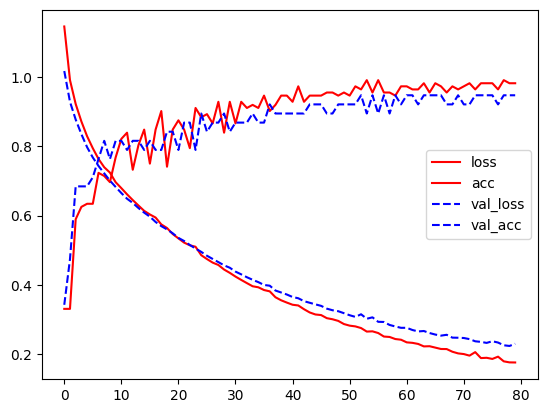

In [13]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
plt.plot(hist_df['loss'],'r',label='loss')
plt.plot(hist_df['accuracy'],'r',label='acc')
plt.plot(hist_df['val_loss'],'--b',label='val_loss')
plt.plot(hist_df['val_accuracy'],'--b',label='val_acc')
plt.legend()

## Accuracy of the Model

In [14]:
# model.fit할때 validation_data로 test를 사용했기 때문에 model.fit의 최종과 같은 값이 출력
score=model.evaluate(X_test, y_test)   
score # 0번은 loss, 1번은 acc

2/2 [==============================] - 0s 4ms/step - loss: 0.2295 - accuracy: 0.9474


[0.22951819002628326, 0.9473684430122375]

## Confirm the Model

In [15]:
len(X_test)
y_test.values[0]

array([False,  True, False])

In [16]:
model.predict(X_test)[:5]

# array([[9.9818399e-03, 9.5285404e-01, 3.7164021e-02],    가장큰값의 위치는 1번째
#        [1.7952520e-03, 9.0466195e-01, 9.3542784e-02],    가장큰값의 위치는 1번째
#        [1.1993999e-03, 7.8250211e-01, 2.1629851e-01],    가장큰값의 위치는 1번째
#        [3.7234826e-05, 2.5962135e-01, 7.4034137e-01],    가장큰값의 위치는 2번째,
#        [9.8781002e-01, 1.2184884e-02, 5.0382359e-06]], dtype=float32) ,    가장큰값의 위치는 0번째

array([[6.3270922e-03, 9.7528130e-01, 1.8391600e-02],
       [1.3767723e-02, 9.3571818e-01, 5.0514087e-02],
       [4.3180250e-02, 7.4260610e-01, 2.1421359e-01],
       [9.1171876e-02, 1.8994869e-01, 7.1887940e-01],
       [9.9940908e-01, 5.7184516e-04, 1.9011435e-05]], dtype=float32)

In [17]:
np.argmax(model.predict(X_test),axis=1)[:5]  # 함수이용해서 가장 큰값의 위치를 찾음. axis=1 옵션으로 행단위로 가장 큰값을 찾음

array([1, 1, 1, 2, 0], dtype=int64)

In [18]:
# 참고(axis 옵션)
a=np.array( [[1,2],
             [2,3],
             [3,4]])
a.sum(), a.sum(axis=1), a.sum(axis=0)

(15, array([3, 5, 7]), array([6, 9]))

In [19]:
y_test[:5]

,Iris-setosa,Iris-versicolor,Iris-virginica
71,False,True,False
86,False,True,False
90,False,True,False
83,False,True,False
6,True,False,False


In [20]:
pred_iris=np.argmax(model.predict(X_test),axis=1)
real_iris=np.argmax(y_test, axis=1) 

resultDf=pd.DataFrame({'real':real_iris, 'pred':pred_iris,'ox':real_iris==pred_iris})
resultDf[:5]

,real,pred,ox
0,1,1,True
1,1,1,True
2,1,1,True
3,1,2,False
4,0,0,True


## Confirm the model by 오차분류표

In [21]:
test_yhat=model.predict(X_test)


# 소프트맥스일때 y값이 원핫인코딩 되어 있다면 아래의 과정1,2가 필요함()
predict_y=np.argmax(test_yhat, axis=1) # [과정1]
real_y=np.argmax(y_test, axis=1)       # [과정2]


## 혼돈행렬(onfusion matrix,오차행렬표)와 분류리포트(classification_report) 에서는
### real_y값하고 predict_y값하고 비교하면서 같으면, 다르면 으로 작업이 자동으로 이루어짐
test_yhat[:5], predict_y[:5], real_y[:5]

(array([[6.3270922e-03, 9.7528130e-01, 1.8391600e-02],
        [1.3767723e-02, 9.3571818e-01, 5.0514087e-02],
        [4.3180250e-02, 7.4260610e-01, 2.1421359e-01],
        [9.1171876e-02, 1.8994869e-01, 7.1887940e-01],
        [9.9940908e-01, 5.7184516e-04, 1.9011435e-05]], dtype=float32),
 array([1, 1, 1, 2, 0], dtype=int64),
 array([1, 1, 1, 1, 0], dtype=int64))

In [22]:
# 오차행렬표임 (교재 388쪽의 하단내용)
import pandas as pd
from sklearn.metrics import confusion_matrix
conMatrix=confusion_matrix(real_y, predict_y)
conMatrix

array([[13,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 12]], dtype=int64)

In [23]:
pd.DataFrame(conMatrix)

,0,1,2
0,13,0,0
1,0,11,2
2,0,0,12


In [24]:
# 오차행렬표를 데이터프레임으로 변환 (rywo 388쪽 가장하단)
# 오차행렬표를 데이터프레임으로 작업하지 않고, 차트로 보여주는 모듈도 있음.
cnt=len(conMatrix)
pd.DataFrame(conMatrix, 
            index=['true_%d' % i for i in range(cnt)],
            columns=['pred_%d' % i for i in range(cnt)] )

,pred_0,pred_1,pred_2
true_0,13,0,0
true_1,0,11,2
true_2,0,0,12


Text(58.222222222222214, 0.5, 'true label')

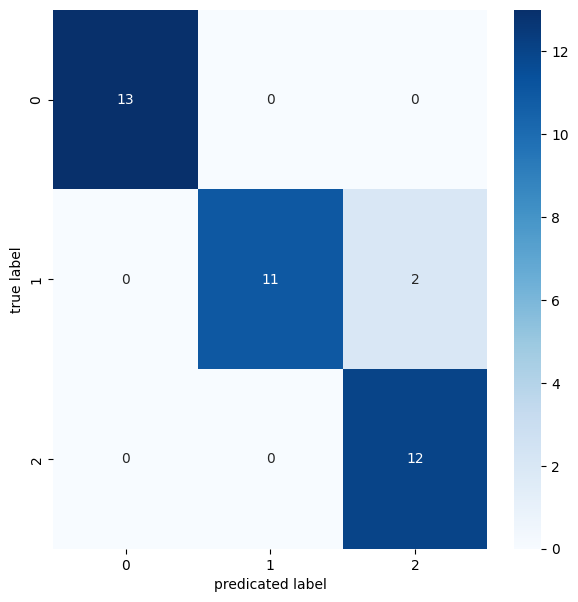

In [25]:
# 오차행렬표를 차트로 보여주는 작업_혼돈행렬
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [26]:
from sklearn.metrics import classification_report
print(classification_report(real_y, predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

